<a href="https://colab.research.google.com/github/Fisissist/Learning-College-Algebra-with-Python/blob/InProgress/Algebra09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Build a Data Graph Explorer

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np
import io

##Get a .csv file in three ways

*   uploading it from the local computer
*   getting a url from user input
*   putting the url in the code

Use the Pandas library to save the .csv as a dataframe

In [41]:
uploaded = files.upload()
file_name = next(iter(uploaded))
table_1 = pd.read_csv(io.BytesIO(uploaded[file_name]))

Saving adult-depression-lghc-indicator-24.csv to adult-depression-lghc-indicator-24.csv


##Print headings and the first two rows

In [42]:
print(table_1.head(2))

   Year Strata Strata Name  Frequency  Weighted Frequency  Percent  \
0  2012  Total       Total       1920                 NaN    11.74   
1  2012    Sex        Male        561           1116664.0     8.12   

   Lower 95% CL  Upper 95% CL  
0         11.11         12.37  
1          7.32          8.92  


In [43]:
print(table_1.head())

   Year          Strata Strata Name  Frequency  Weighted Frequency  Percent  \
0  2012           Total       Total       1920                 NaN    11.74   
1  2012             Sex        Male        561           1116664.0     8.12   
2  2012             Sex      Female       1359           2163108.0    15.25   
3  2012  Race-Ethnicity       White       1314           1806371.0    14.57   
4  2012  Race-Ethnicity       Black         97            222022.0    13.54   

   Lower 95% CL  Upper 95% CL  
0         11.11         12.37  
1          7.32          8.92  
2         14.30         16.20  
3         13.67         15.46  
4         10.44         16.65  


##Store the column names as a list

In [44]:
col_names = table_1.columns.tolist()

print(col_names)

['Year', 'Strata', 'Strata Name', 'Frequency', 'Weighted Frequency', 'Percent', 'Lower 95% CL', 'Upper 95% CL']


##Choose one or two columns and convert the data to Numpy arrays

In [46]:
y = table_1['Percent'].to_numpy()
x = table_1['Strata Name'].to_numpy()

##Display data as a scatter plot or a line graph

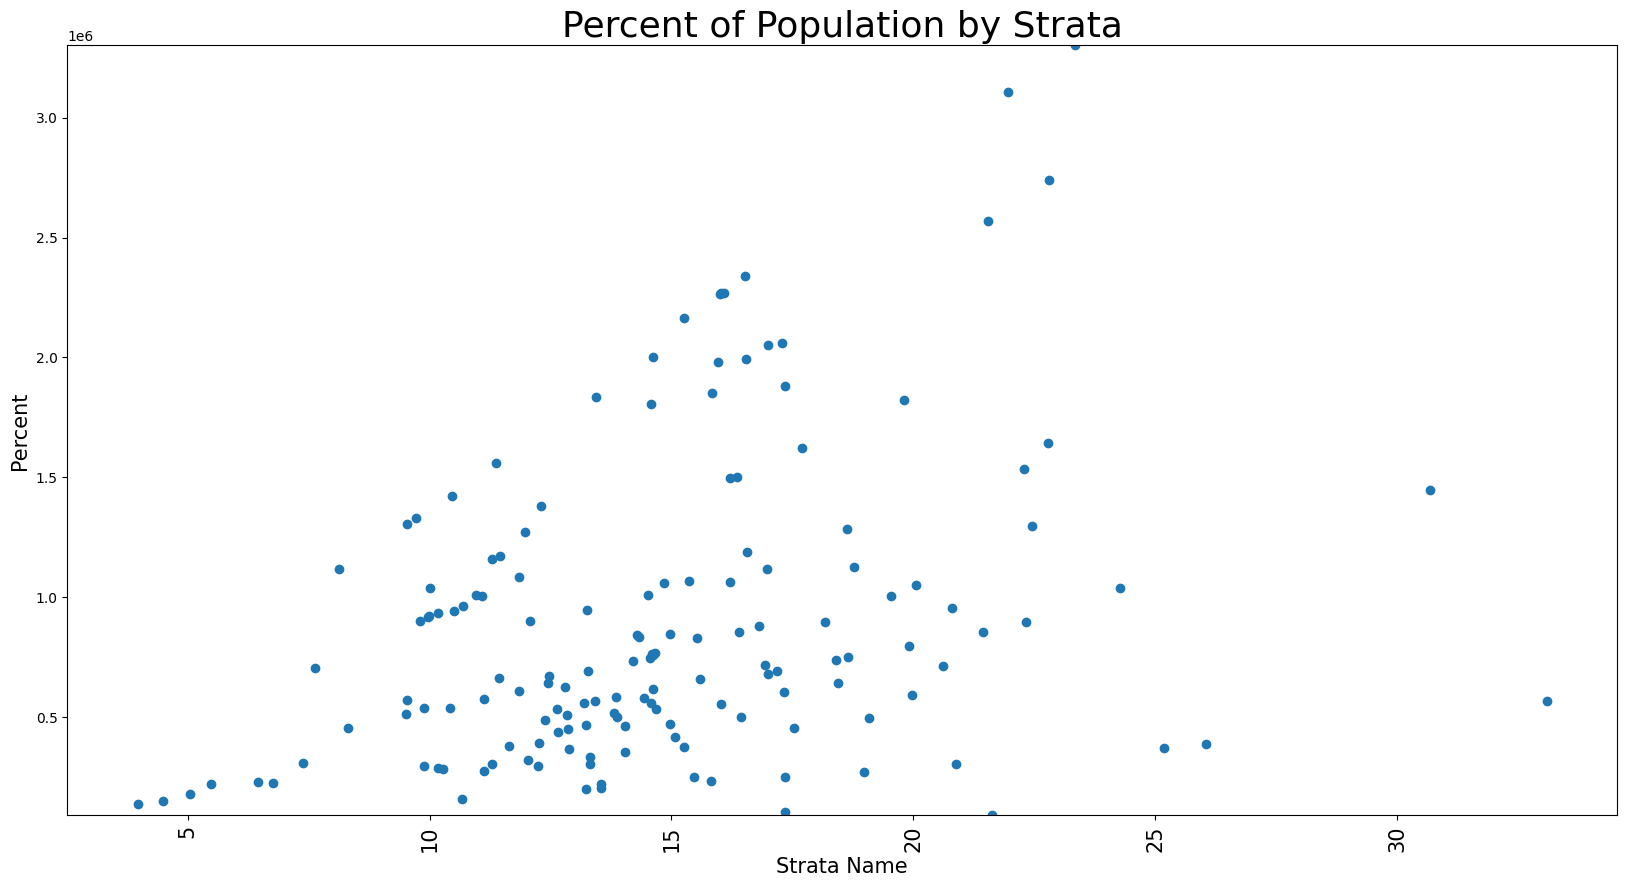

In [126]:
# Scatter plot of percentage
ymin = y.min() - 5
ymax = y.max() + 5

fig, ax = plt.subplots(figsize=(20, 10))

ax.scatter(x, y)
ax.set_ylim(ymin, ymax)

ax.set_title('Percent of Population by Strata',fontsize=26)
ax.set_xlabel('Strata Name',fontsize=15)
ax.set_ylabel('Percent',fontsize=15)

ax.xaxis.set_tick_params(rotation=90)
ax.tick_params(axis='x', labelsize=15)

plt.show()

##Be able to do this for different column combinations, and interpret the graphs

###Frequency of Strata by Percent

(0.0, 1969.0)

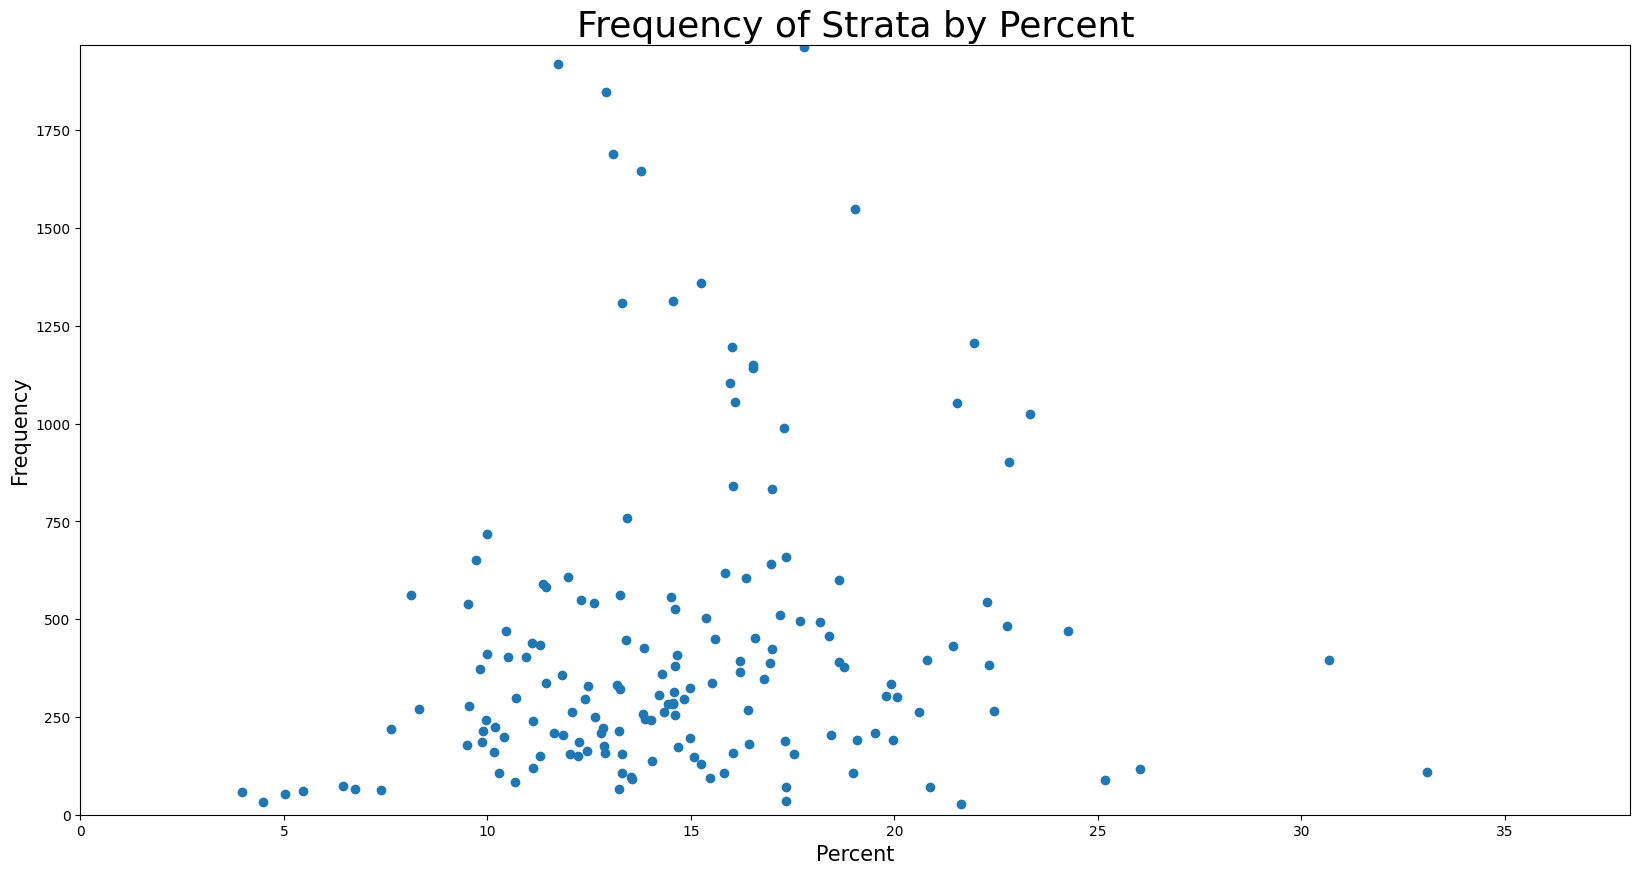

In [123]:
x = table_1['Percent'].to_numpy()
y = table_1['Frequency'].to_numpy()

xmin = 0
xmax = x.max() + 5
ymin = 0
ymax = y.max() + 5

fig, ax = plt.subplots(figsize=(20, 10))

ax.set_title('Frequency of Strata by Percent',fontsize=26)
ax.set_xlabel('Percent',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)

ax.scatter(x, y)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

####Analysis

Within the red box there is a large cluster of frequancy per percent, with tighter clusters about `(14.5, 265)` and `(12.5, 200)`.

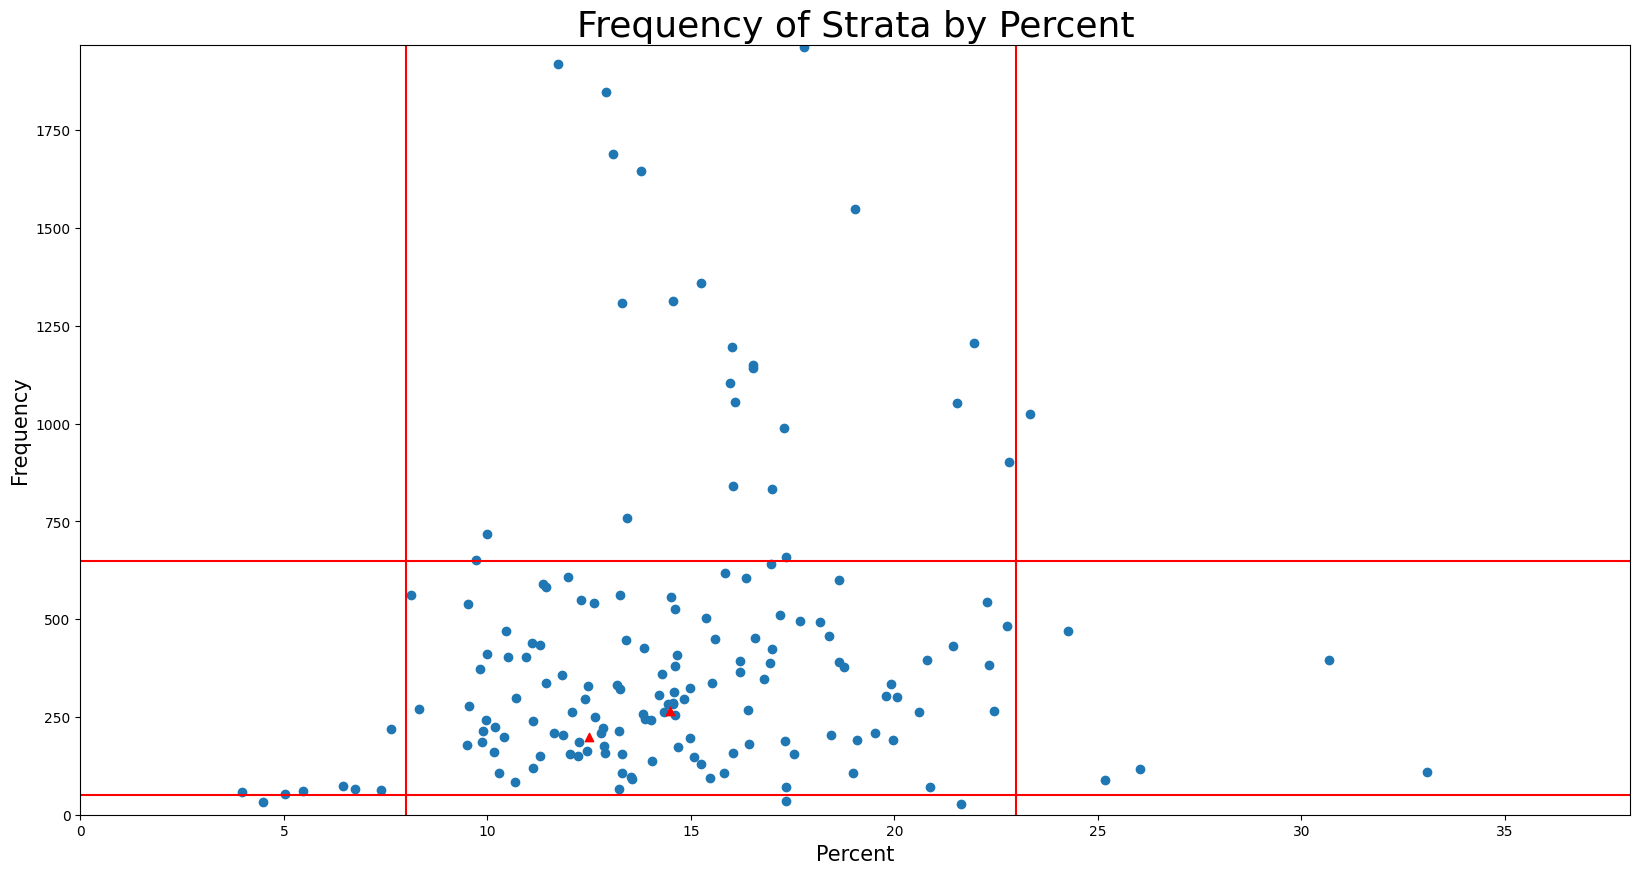

In [124]:
x = table_1['Percent'].to_numpy()
y = table_1['Frequency'].to_numpy()

xmin = 0
xmax = x.max() + 5
ymin = 0
ymax = y.max() + 5

fig, ax = plt.subplots(figsize=(20, 10))

ax.set_title('Frequency of Strata by Percent',fontsize=26)
ax.set_xlabel('Percent',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)

ax.scatter(x, y)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

plt.axhline(y=50, color='r')
plt.axhline(y=650, color='r')
plt.axvline(x=8, color='r')
plt.axvline(x=23, color='r')

plt.scatter(14.5, 265, color='r',marker='^')
plt.scatter(12.5, 200, color='r',marker='^')

plt.show()

###Weighted Frequency of Strata by Percent

(0.0, 3401418.0)

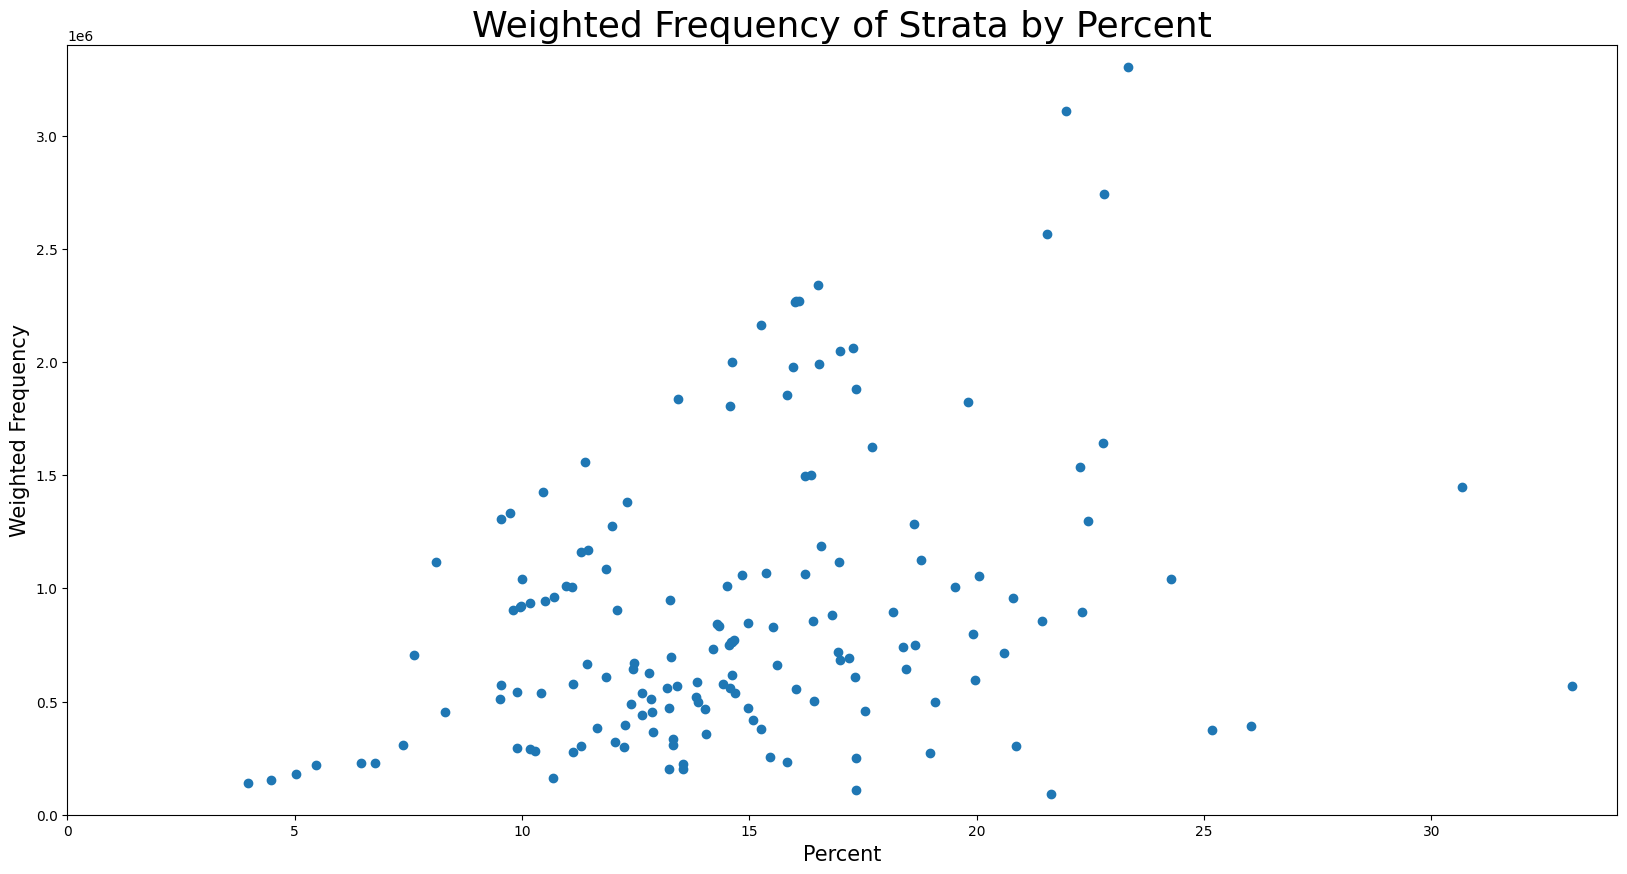

In [122]:
x = table_1['Percent'].to_numpy()
y = table_1['Weighted Frequency'].to_numpy()

# Remove NaN values from y and corresponding values from x
mask = np.isfinite(y)  # Create a mask for finite values in y
y = y[mask]  # Filter y to keep only finite values
x = x[mask]  # Filter x using the same mask

xmin = 0
xmax = x.max() + 1
ymin = 0
ymax = y.max() + 10**5

fig, ax = plt.subplots(figsize=(20, 10))

ax.set_title('Weighted Frequency of Strata by Percent',fontsize=26)
ax.set_xlabel('Percent',fontsize=15)
ax.set_ylabel('Weighted Frequency',fontsize=15)

ax.scatter(x, y)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

####Analysis

Within the red box there is a large cluster of weighted frequancy per percent, with a tighter cluster about `(13, .5*10**6)`.

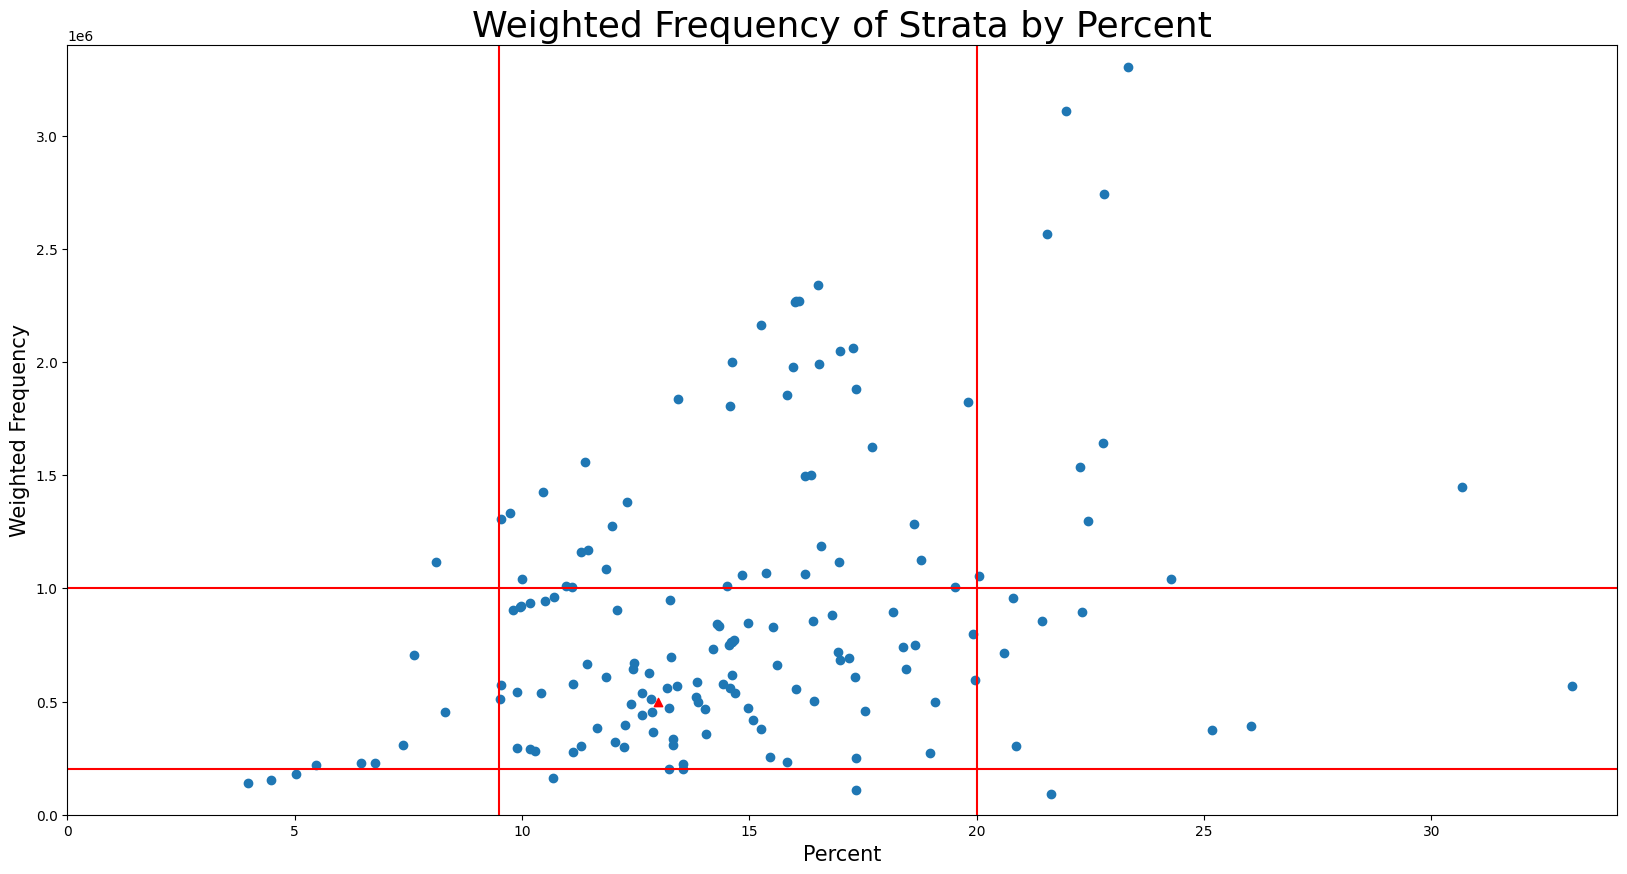

In [125]:
x = table_1['Percent'].to_numpy()
y = table_1['Weighted Frequency'].to_numpy()

# Remove NaN values from y and corresponding values from x
mask = np.isfinite(y)  # Create a mask for finite values in y
y = y[mask]  # Filter y to keep only finite values
x = x[mask]  # Filter x using the same mask

xmin = 0
xmax = x.max() + 1
ymin = 0
ymax = y.max() + 10**5

fig, ax = plt.subplots(figsize=(20, 10))

ax.set_title('Weighted Frequency of Strata by Percent',fontsize=26)
ax.set_xlabel('Percent',fontsize=15)
ax.set_ylabel('Weighted Frequency',fontsize=15)

ax.scatter(x, y)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

plt.axhline(y=.2*10**6, color='r')
plt.axhline(y=1*10**6, color='r')
plt.axvline(x=9.5, color='r')
plt.axvline(x=20, color='r')

plt.scatter(13, .5*10**6, color='r',marker='^')

plt.show()